In [1]:
# importing numpy library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    # first all the individual features are multiplied by difference in their Y values (actual , prediction)- 
    # then are summed feature wise and not equation wise to give feature wise weights for individual Xs in X say x1 , x2 etc.

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
 

  def predict(self, X):

    return X.dot(self.w) + self.b



In [3]:
# loading the data from csv file to pandas dataframe
salary_data = pd.read_csv('salary_data.csv')

In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
X = salary_data.iloc[:,:-1]
Y = salary_data.iloc[:,1]

In [6]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33,random_state = 2 )

In [7]:
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)

In [8]:
model.fit(X_train,Y_train)

In [9]:
# print the parameters

print('weight = ', model.w.iloc[0])
print('bias = ', model.b)

weight =  9580.301196603597
bias =  23226.38946603212


In [10]:
testPredict = model.predict(X_test)

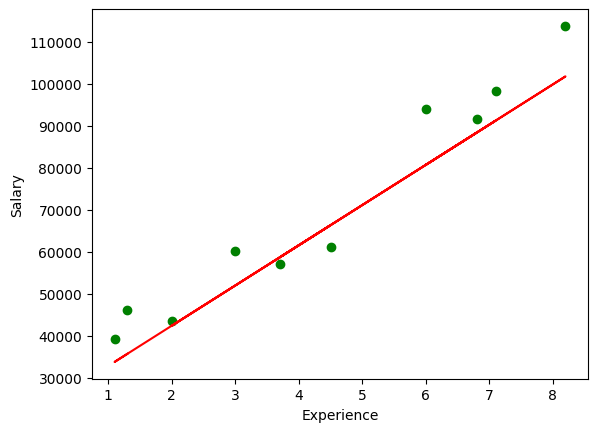

In [11]:
plt.scatter(X_test,Y_test,color = 'green')
plt.plot(X_test,testPredict,color = 'red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error as mse

In [13]:
mse(Y_test,testPredict)

np.float64(62008180.66435532)

In [14]:
#Else We can do ->
np.square(Y_test-testPredict).sum()/Y_test.size

np.float64(62008180.66435532)